# Data Exploration and Preparation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            23622 non-null  object 
 1   holiday              31 non-null     object 
 2   weather_main         23622 non-null  object 
 3   weather_description  23622 non-null  object 
 4   rain_1h              23622 non-null  float64
 5   snow_1h              23622 non-null  float64
 6   clouds_all           23622 non-null  int64  
 7   temp                 23622 non-null  float64
 8   traffic_volume       23622 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [10]:
df.isna().sum()

date_time                  0
holiday                23591
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
dtype: int64

Only the "holiday" variable has mising values so an analysis needs to be perform to infer in which circumstances these happen.

In [11]:
df.describe()

,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


From the previous report we conclude that the variable "snow_1h" only has one possible value: 0.0. This lack of variance sugests that it may not present predictive value when performing forecasts. Consequently, it may be removed from the data set.

In [12]:
df.describe(exclude=[np.number])

,date_time,holiday,weather_main,weather_description
count,23622,31,23622,23622
unique,19608,11,11,37
top,2018-08-24 07:00:00,Labor Day,Clear,sky is clear
freq,5,5,7027,6268


From the previous table, we see that not all values of "date_time" are unique, indicating there is more than one entry at the same day and hour in several occasions. We need to analyze why these happens.

It is important to remember that the time interval of the data set is from July 2016 to September 2018, so not all holidays have the same frequency. Still, an analysis of these variable needs to be done, since the total values count is only 31. This number should be much higher, since all the 24 data entries for the day the holiday takes place, should be have the holiday value present, which seems to not be happening.

The "weather_main" and "weather_description" seem to be coherent to their definition, not having any missing values.

In [13]:
# Get all the possible values of the 'holiday' column
print(df['holiday'].value_counts())

holiday
Labor Day                    5
Martin Luther King Jr Day    5
Independence Day             3
State Fair                   3
Christmas Day                3
Veterans Day                 2
Columbus Day                 2
Thanksgiving Day             2
New Years Day                2
Washingtons Birthday         2
Memorial Day                 2
Name: count, dtype: int64


By obtaining the possible values of the "holiday" column and their frequency, we see which are the considered holidays and what their distribution is. We will take the "Labor Day" as an example and explore it.

In [14]:
df[df['holiday'] == 'Labor Day']

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
12300,2017-09-04 00:00:00,Labor Day,Clear,sky is clear,0.00,0.0,1,295.54,1026
22748,2018-09-03 00:00:00,Labor Day,Rain,light rain,0.25,0.0,1,292.43,962
22749,2018-09-03 00:00:00,Labor Day,Mist,mist,0.25,0.0,1,292.43,962


As we have remarked previously, there is more than one record for the same "date_time". In this case, the only differences between both records are present in the "weather_main" and "weather_description" columns. This may suggest that different sensors registered or classified the weather conditions differently at the same time.

Taking the day "2016-09-05" as an example, which is the first "Labor Day" recorded in the data set, we will check how the data was recorded in that day

In [15]:
# Get all entries when date_time has '2016-09-05' present in it
print("Size:", df[df['date_time'].str.contains('2016-09-05')].shape)
df[df['date_time'].str.contains('2016-09-05')]

Size: (40, 9)


,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
1737,2016-09-05 00:00:00,Labor Day,Rain,moderate rain,1.52,0.0,90,293.17,1064
1738,2016-09-05 00:00:00,Labor Day,Thunderstorm,proximity thunderstorm,1.52,0.0,90,293.17,1064
1739,2016-09-05 01:00:00,NaN,Rain,moderate rain,1.40,0.0,40,292.22,537
1740,2016-09-05 01:00:00,NaN,Thunderstorm,proximity thunderstorm,1.40,0.0,40,292.22,537
1741,2016-09-05 02:00:00,NaN,Rain,light rain,0.25,0.0,1,292.39,369
1742,2016-09-05 02:00:00,NaN,Thunderstorm,proximity thunderstorm,0.25,0.0,1,292.39,369
1743,2016-09-05 03:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,0.00,0.0,1,292.94,250
1744,2016-09-05 03:00:00,NaN,Rain,light rain,0.00,0.0,1,292.94,250
1745,2016-09-05 04:00:00,NaN,Rain,heavy intensity rain,10.16,0.0,90,292.15,278
1746,2016-09-05 04:00:00,NaN,Thunderstorm,thunderstorm with heavy rain,10.16,0.0,90,292.15,278


With the previous information, we conclude that most hours have more than one record.

We see that only the midnight record has a "holiday" value.

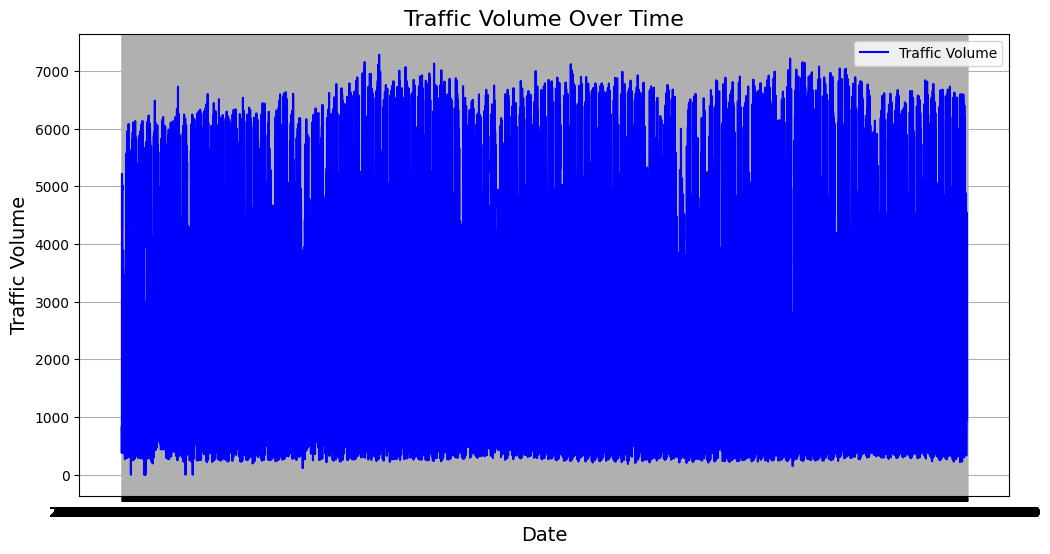

In [16]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['date_time'], df['traffic_volume'], label='Traffic Volume', color='blue')
plt.title('Traffic Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Data Pre-Processing

In [34]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume_reduced.csv')
# Convert date_time to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])
# Get all the possible values of the 'holiday' column
df['holiday'].value_counts(dropna=False)
df.drop(columns=['snow_1h'], inplace=True)

We have an issue where only the first hour of the day on the holidays has the column holiday filled. We need to fill the rest of the day with the same value.

In [35]:
# Create a date column for easier grouping
df['date'] = df['date_time'].dt.date

# For each date with a holiday, propagate that holiday value to all rows of that date
holiday_dates = df[df['holiday'].notna()][['date', 'holiday']].drop_duplicates()
holiday_dict = dict(zip(holiday_dates['date'], holiday_dates['holiday']))

# Fill in the holiday values
df['holiday'] = df['date'].map(holiday_dict)

# Remove the temporary date column if you don't need it
df = df.drop('date', axis=1)

df['holiday'].value_counts(dropna=False)


holiday
NaN                          22877
Labor Day                      111
Martin Luther King Jr Day       84
Independence Day                78
State Fair                      72
Thanksgiving Day                66
New Years Day                   66
Washingtons Birthday            65
Christmas Day                   54
Memorial Day                    54
Veterans Day                    48
Columbus Day                    47
Name: count, dtype: int64

We have certain days where we have less than 24 rows meaning there are days without all values
In this case we should generate rows to fill those hours based on the average value for the same hour in the previous week value and the next week value.
The rain_1h and clouds_all should have the average value of the row before and after the missing row.
The weather_main and weather_description should be the values from the previous row.

In [36]:
# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates(subset=["date_time"], keep="first")

# First ensure date_time is our index
df = df.set_index("date_time").sort_index()

# Create a complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="h")

# Identify missing timestamps
missing_timestamps = date_range.difference(df.index)

print(f"Number of missing timestamps: {len(missing_timestamps)}")

# Create DataFrame for missing timestamps
missing_df = pd.DataFrame(index=missing_timestamps, columns=df.columns)

# For each missing timestamp, calculate values
for timestamp in missing_timestamps:
    # Get same hour from previous and next week
    prev_week = timestamp - pd.Timedelta(weeks=1)
    next_week = timestamp + pd.Timedelta(weeks=1)

    # Get values for same hour from prev and next week if they exist
    prev_week_value = df[df.index == prev_week]["traffic_volume"].values
    next_week_value = df[df.index == next_week]["traffic_volume"].values

    # Calculate average traffic volume
    values_to_average = []
    if len(prev_week_value) > 0:
        values_to_average.append(prev_week_value[0])
    if len(next_week_value) > 0:
        values_to_average.append(next_week_value[0])

    if values_to_average:
        avg_traffic = np.mean(values_to_average)
    else:
        # If no values available, use the mean traffic for that hour across all days
        hour = timestamp.hour
        avg_traffic = df[df.index.hour == hour]["traffic_volume"].mean()

    # Fill in traffic and temperature
    missing_df.loc[timestamp, "traffic_volume"] = int(avg_traffic)
    missing_df.loc[timestamp, "temp"] = df["temp"].mean()

    # Get the rows immediately before and after the missing timestamp
    prev_row = (
        df[df.index < timestamp].iloc[-1] if len(df[df.index < timestamp]) > 0 else None
    )
    next_row = (
        df[df.index > timestamp].iloc[0] if len(df[df.index > timestamp]) > 0 else None
    )

    # Calculate average of rain_1h and clouds_all from adjacent rows
    if prev_row is not None and next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = (
            prev_row["rain_1h"] + next_row["rain_1h"]
        ) / 2
        missing_df.loc[timestamp, "clouds_all"] = int(
            (prev_row["clouds_all"] + next_row["clouds_all"]) / 2
        )
    elif prev_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = prev_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = prev_row["clouds_all"]
    elif next_row is not None:
        missing_df.loc[timestamp, "rain_1h"] = next_row["rain_1h"]
        missing_df.loc[timestamp, "clouds_all"] = next_row["clouds_all"]
    else:
        missing_df.loc[timestamp, "rain_1h"] = 0
        missing_df.loc[timestamp, "clouds_all"] = int(df["clouds_all"].mean())

    # Use weather values from previous row
    if prev_row is not None:
        missing_df.loc[timestamp, "weather_main"] = prev_row["weather_main"]
        missing_df.loc[timestamp, "weather_description"] = prev_row[
            "weather_description"
        ]
    else:
        missing_df.loc[timestamp, "weather_main"] = (
            next_row["weather_main"]
            if next_row is not None
            else df["weather_main"].mode()[0]
        )
        missing_df.loc[timestamp, "weather_description"] = (
            next_row["weather_description"]
            if next_row is not None
            else df["weather_description"].mode()[0]
        )

    # Fill holiday based on the date
    date = timestamp.date()
    if date in holiday_dict:
        missing_df.loc[timestamp, "holiday"] = holiday_dict[date]
    else:
        missing_df.loc[timestamp, "holiday"] = None

# Combine original and missing data
df_complete = pd.concat([df, missing_df])
df_complete = df_complete.sort_index()

# Verify we now have 24 hours for each day
days_hours = df_complete.groupby(df_complete.index.date).size()
print("\nNumber of hours per day after filling:")
print(days_hours.value_counts())

Number of missing timestamps: 120

Number of hours per day after filling:
24    822
Name: count, dtype: int64


# Modeling

# Model Evaluation